# Guided Project: Predicting Heart Disease using Supervised ML

## Table of Contents 
1. [Introduction](#introduction)
2. [Understanding the Data](#understanding-data)
3. [EDA: Descriptive Statistics](#eda-descr)
5. [EDA:Visualisations](#eda-vis)
6. [Data Cleaning](#data-cleaning)
7. [Feature Selection](#feat-selec)
8. [Building a Classifier I](#build-class-I)
9. [Building a Classifier II](#build-class-II)
10. [Hyperparameter Tuning](#hyperparam)
11. [Model Evaluation on Test Set](#model-eval)


## Introduction <a name="introduction"></a>

![human-heart-design_1048-1855.png](img/predictheartdisease/human-heart-design_1048-1855.png)

Image source: [User: fedesoriano, kaggle.com](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

This is a project I completed based on a guide called "Predicting Heart Disease" on the Dataquest learning platform. 

In this project I have learned new skills related to Machine Learning in Python. 

The implementation is written in Python and is shown in Jupyter Notebooks.

### Goal of this project

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

## Understanding the Data <a name="understanding-data"></a>

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

### Import the dependencies
First we need to import the libraries we think will at minimum be required for this project: pandas, numpy and matplotlib.pyplot.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load and explore the data
The heart disease observations are stored in 1 file.
1. heart.csv

In [2]:
# load files into dataframes
heart_df = pd.read_csv("data/predictheartdisease/heart.csv")

1. Display the first five rows of the dataframe.
3. Print out the number of features and observations in the dataset.


In [3]:
# explore the heart disease data
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(f"Number of features: {heart_df.shape[1]}")
print(f"Number of observations: {heart_df.shape[0]}")

Number of features: 12
Number of observations: 918


## EDA: Descriptive Statistics <a name="eda-descr"></a>

In [5]:
# identify which columns are numerical and which are categorical
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Explore and analyze the numerical columns

In [6]:
# Display the descriptive statistics for the DataFrame.
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Observations
- Each row in the dataset represents one patient
- The average age is 54
- It seems unusual to have a negative value of -2.6 for the minimum  of column Oldpeak
- There are some zero values for some columns which are not representing binary (0 or 1), like Cholesterol and RestingBP

## EDA: Visualizations <a name="eda-vis"></a>

### Explore the categorical features

In [7]:
# Calculate the number of missing values in all columns
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no empty values across all columns.

#### Number of rows for each of the categorical columns, split by their values

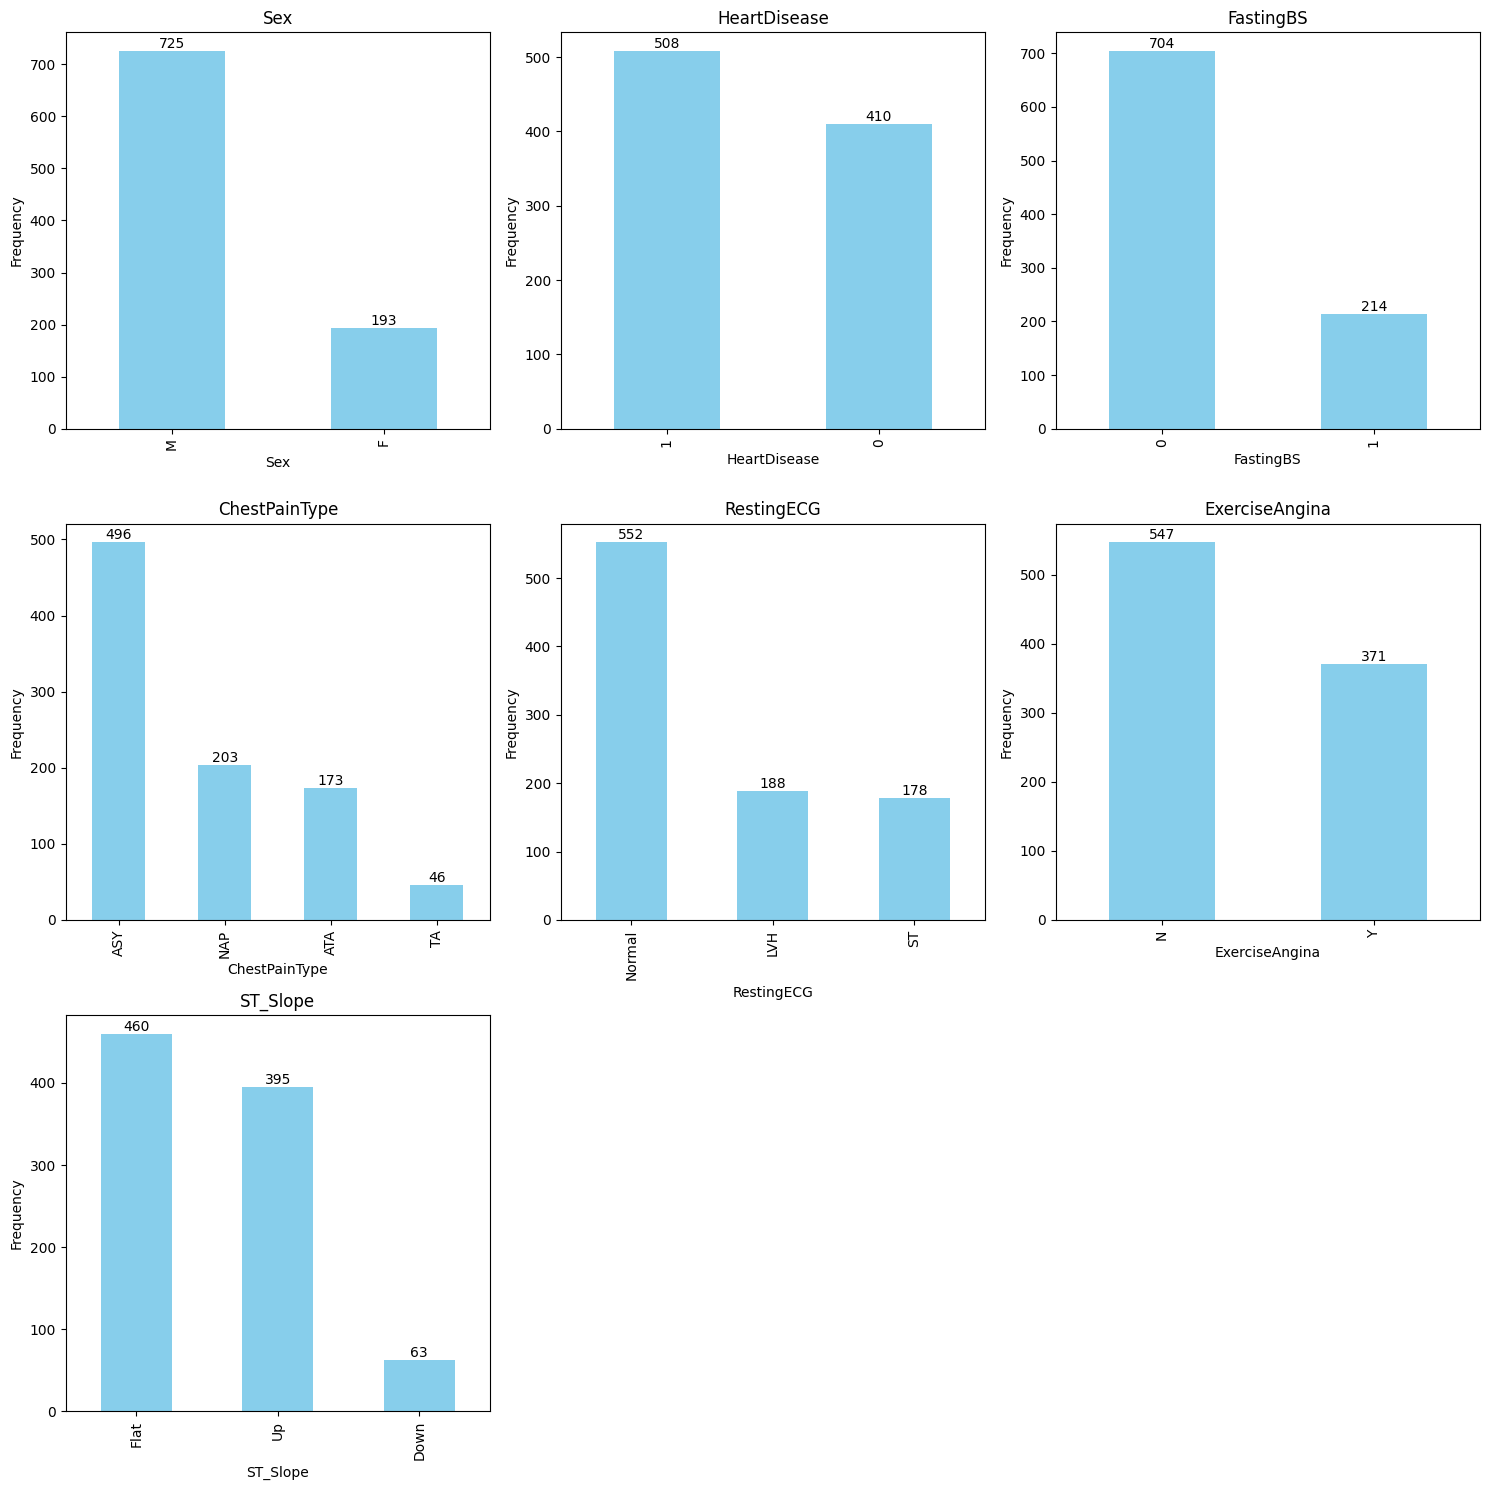

In [8]:
# List of categorical columns
cat_columns = ['Sex', 'HeartDisease', 'FastingBS', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' ]

# Create a subplot with appropriate size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through each column and create a bar chart
for i, column in enumerate(cat_columns):
    ax = axes[i // 3, i % 3]
    heart_df[column].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')
        
# Remove subplots 8 and 9
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

We see limited value from these following observations:
- there are 725 males and 193 female patients in the observations
- for the ST_Slope (the slope of the peak exercise ST segment), the "Flat" and "Up" rows are similar in number, with "Down" being much lower

#### Number of rows for each of the categorical columns, split by their values

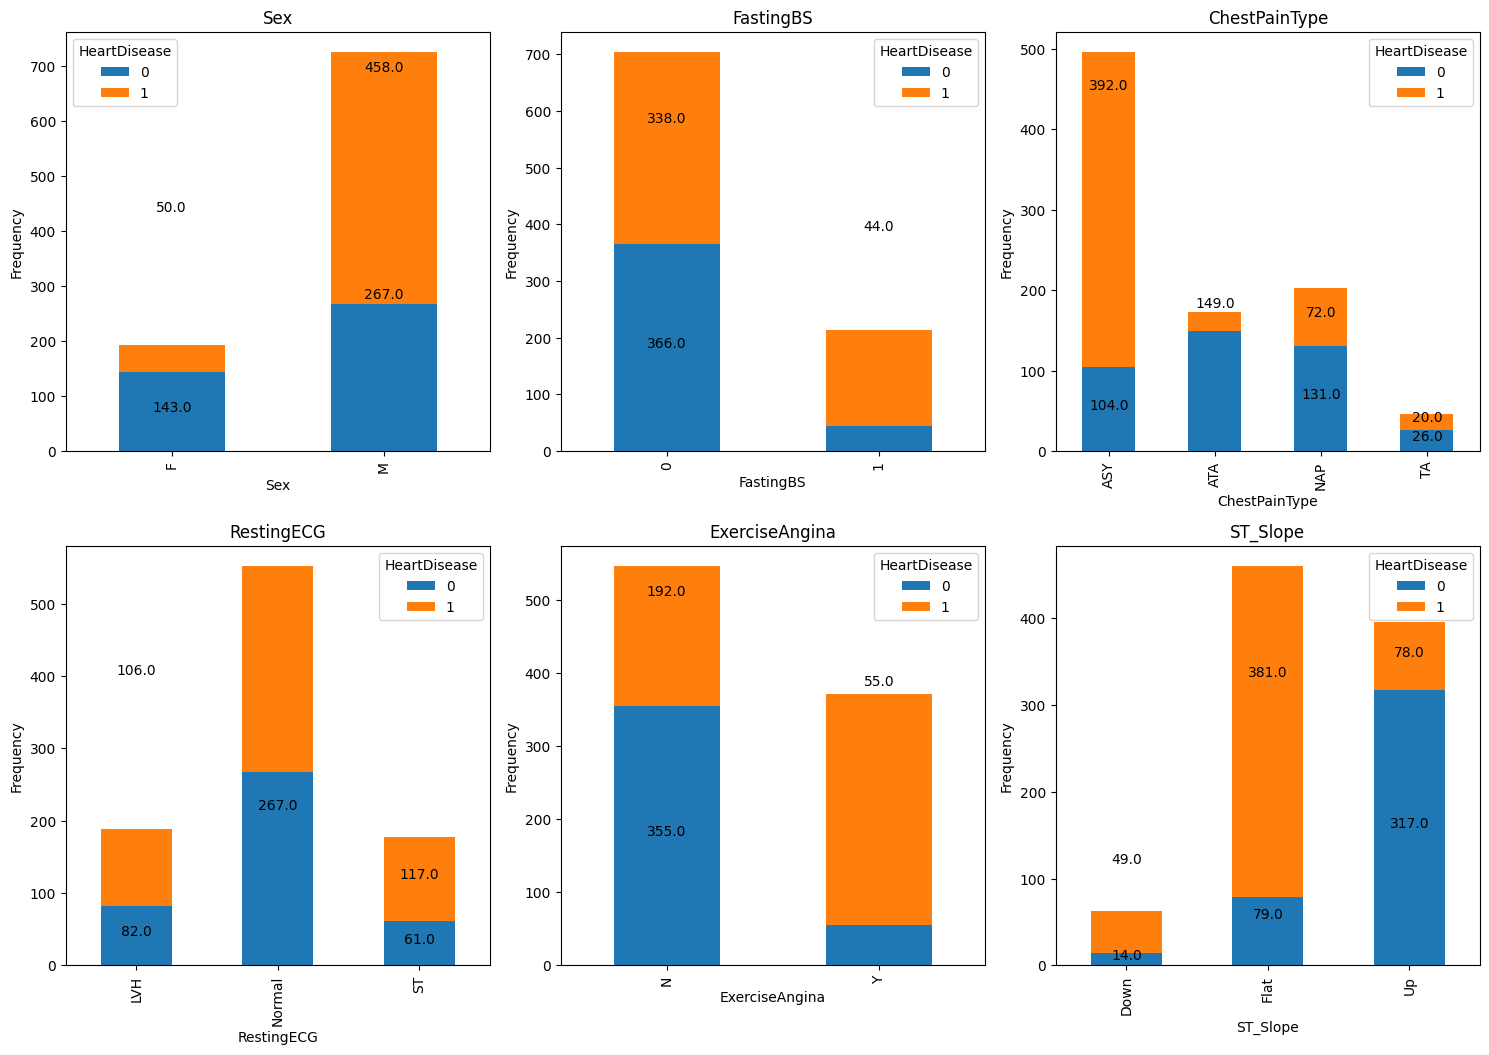

In [9]:
# List of categorical columns
cat_columns = ['Sex', 'FastingBS', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create a subplot with appropriate size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through each column and create a stacked bar chart
for i, column in enumerate(cat_columns):
    ax = axes[i // 3, i % 3]
    
    # Generate stacked bar data using pd.crosstab()
    stacked_data = pd.crosstab(index=heart_df[column], columns=heart_df['HeartDisease'])
    
    # Plot stacked bar chart
    stacked_data.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
    # Initialize a variable to keep track of the cumulative height
    cum_heights = [0] * len(stacked_data)
    
    # Loop through each stack and annotate the bars with their values
    for p in ax.patches:
        # Calculate the middle of each stack
        middle_x = p.get_x() + p.get_width() / 2
        height = p.get_height()
        idx = int(p.get_x())
        
        # Adjust the annotation position vertically based on the cumulative height
        middle_y = cum_heights[idx] + height / 2
        
        ax.annotate(str(height), (middle_x, middle_y),
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points')
        
        # Update the cumulative height for the next bar in the stack
        cum_heights[idx] += height

# Remove subplots 7, 8 and 9
fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

The above charts are a bit more useful. The following factors seem to play a strong role in the prevalence of heart disease:
- males have a higher representation in heart disease
- A positive fasting bloods sugar level
- The chest pain type ASY (Asymptomatic)
- Resting ECG when normal, there's about a 50% split. Otherwise, there's a strong indication
- Exercise Angina, when present also seems to indicate strongly
- an ST Slope of "Flat" gives a strong indication

## Data Cleaning <a name="data-cleaning"></a>

Mainly about looking at zeros and deciding on what to do.

- Count the number of rows that have a 0 value for RestingBP.
- Count the number of rows that have a 0 value for Cholesterol.
- Based on the above two, either
    - Remove those rows from the dataset, or
    - Replace those values with the median value of the corresponding column and the corresponding HeartDisease value.

In [10]:
# Count the number of rows that have a 0 value for RestingBP
(heart_df['RestingBP']==0).sum()

1

There is only 1 row with zero for RestingBP, so its reasonable to remove it.

In [11]:
# Remove row that hawe a 0 value for RestingBP
heart_df = heart_df[heart_df['RestingBP'] != 0]

In [12]:
# Count the number of rows that have a 0 value for Cholesterol
(heart_df['Cholesterol']==0).sum()

171

There are 171 rows with zero for Cholesterol, which is a significant number of observations. Let's replace the zeros with the median value for Cholesterol and the corresponing Heart Disease value.

In [13]:
# Replace rows that hawe a 0 value for Cholesterol with median value for Cholesterol
median_cholesterol = heart_df['Cholesterol'].median()
heart_df.loc[heart_df.Cholesterol == 0, 'Cholesterol'] = median_cholesterol

In [14]:
# Checking if these two columns still have zeros in them
resting_bp_zeros = (heart_df['RestingBP']==0).sum()
cholesterol_zeros = (heart_df['Cholesterol']==0).sum()
print(f"Number of zeros in RestingBP: {resting_bp_zeros}")
print(f"Number of zeros in Cholesterol: {cholesterol_zeros}")

Number of zeros in RestingBP: 0
Number of zeros in Cholesterol: 0


## Feature Selection <a name="feat-selec"></a>

We select some features which make most sense based on the EDA done before, and then create dummy variables for them. 
- Age
- Sex
- ChestPainType
- Cholesterol
- FastingBS
- ExerciseAngina
- ST_Slope

In [15]:
# Select some feature to start with
heart_df = heart_df[['Age', 'Sex','ChestPainType', 'Cholesterol', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']]

In [16]:
# create dummy variables and preview the first 5 rows
heart_df_dummies = pd.get_dummies(heart_df, drop_first=True)
heart_df_dummies.head()

,Age,Cholesterol,FastingBS,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,289,0,0,True,True,False,False,False,False,True
1,49,180,0,1,False,False,True,False,False,True,False
2,37,283,0,0,True,True,False,False,False,False,True
3,48,214,0,1,False,False,False,False,True,True,False
4,54,195,0,0,True,False,True,False,False,False,True


To identify which features are reasonably correlated to HeartDisease, plot a Pearson's correlation heat map.

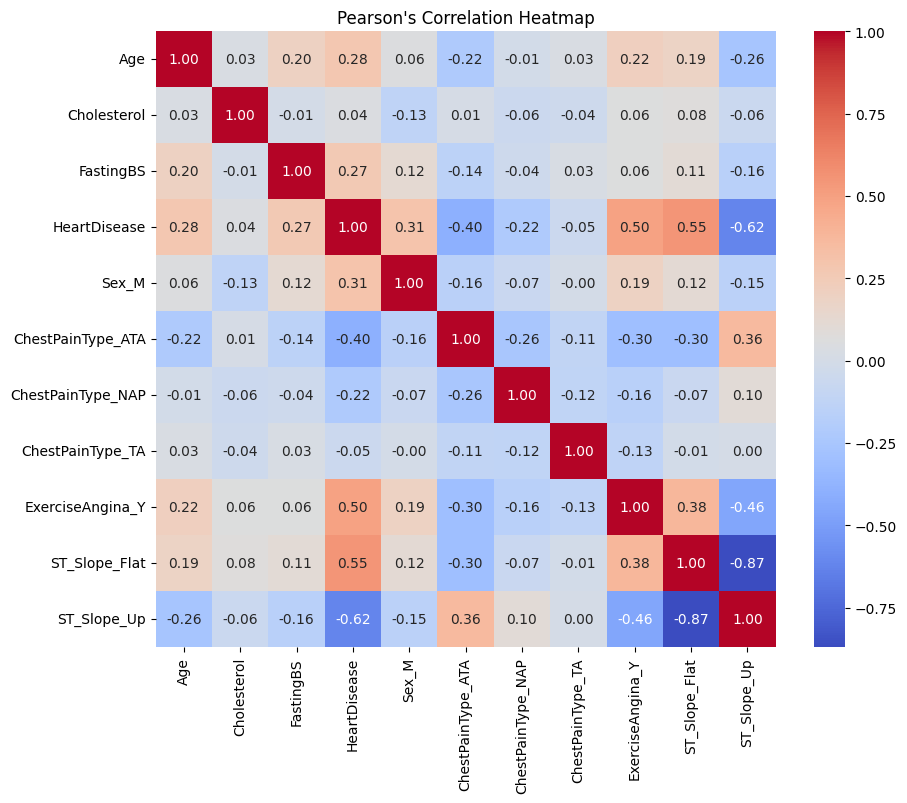

In [17]:
# Calculate Pearson's correlation coefficient
correlation_matrix = heart_df_dummies.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Heatmap")
plt.show()

Of all the features, ST_Slope appears to have the strongest correlation with other features.

## Building a Classifier I <a name="build-class-I"></a>

From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

- ChestPainType_ATA
- ExerciseAngina_Y
- Sex_M
- ST_Slope_Flat
- ST_Slope_Up

In [18]:
# create final dataset based on the above identified features
heart_df_final = heart_df_dummies[['ChestPainType_ATA', 'ExerciseAngina_Y', 'Sex_M', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']]
heart_df_final

,ChestPainType_ATA,ExerciseAngina_Y,Sex_M,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,True,False,True,False,True,0
1,False,False,False,True,False,1
2,True,False,True,False,True,0
3,False,True,False,True,False,1
4,False,False,True,False,True,0
...,...,...,...,...,...,...
913,False,False,True,True,False,1
914,False,False,True,True,False,1
915,False,True,True,True,False,1
916,True,False,False,True,False,1


Next, we will create and train multiple models using one of those features at a time.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and validation sets
X = heart_df_final.drop(['HeartDisease'], axis=1)
y = heart_df_final["HeartDisease"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 18)

# Create a list that contains selected features as strings
selected_features = ['ChestPainType_ATA', 'ExerciseAngina_Y', 'Sex_M', 'ST_Slope_Flat', 'ST_Slope_Up']

# Iterate over the list of features to create a 1-feature model using each selected feature and print its validation dataset score
for feat in selected_features:
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(X_train[[feat]], y_train)
    val_score = model.score(X_val[[feat]], y_val)
    print(f"Accuracy score for model using feature {feat}: {val_score*100:.1f}%")

Accuracy score for model using feature ChestPainType_ATA: 66.7%
Accuracy score for model using feature ExerciseAngina_Y: 73.6%
Accuracy score for model using feature Sex_M: 64.1%
Accuracy score for model using feature ST_Slope_Flat: 76.1%
Accuracy score for model using feature ST_Slope_Up: 77.9%


Out of the selected features, using only ST_Slope_Up performed the best in a KNN model with a score of 77.9%.
Using only Sex_M results in an underperforming model with a score of 64.1%. 

## Building a Classifier II <a name="build-class-II"></a>

What if we trained a model on all of these features together?

Before that, let's scale our selected features as so their values are all in the range (0, 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit and transform the features in the training & validation datasets using the scaler and save the output
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_val_scaled = scaler.transform(X_val[selected_features])

# Create the model, train it, evaluate it on validation dataset
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_scaled, y_train)
test_accuracy = model.score(X_val_scaled, y_val) 
print(f"Accuracy score for model using all features: {val_score*100:.1f}%")

Accuracy score for model using all features: 77.9%


As we can see, using all selected features in the model gives the same accuracy score as the model which uses only the feature ST_Slope_Up.

## Hyperparameter Tuning <a name="hyperparam"></a>

In [21]:
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18)

# Scale the training set
X_train_scaled = scaler.transform(X_train[selected_features])

# Create a dictionary to store the parameters for searching
parameters = {
    'n_neighbors': [1, 4, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Create the model
model = KNeighborsClassifier()

# Create GridSearchCV instance
model_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, error_score='raise')

# Fit GridSearchCV instance
model_grid.fit(X_train_scaled, y_train)

# Print best score and best parameters
best_score = model_grid.best_score_
print(f"Best accuracy score for model: {best_score*100:.1f}%")
print("Best parameters for model: ", model_grid.best_params_)

Best accuracy score for model: 85.3%
Best parameters for model:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


## Model Evaluation on Test Set <a name="model-eval"></a>

Let's evaluate this model on our test set. Normalize the test set and use the same scaler created earlier.

In [22]:
from sklearn.metrics import accuracy_score

# Scale the same features from the test set
X_test_scaled = scaler.transform(X_test[selected_features])

# Predict the model's output on the scaled features from the test set using the best estimate
predictions_test = model_grid.best_estimator_.predict(X_test_scaled)

# Calculate and print the accuracy of the model's prediction
acc_score = accuracy_score(y_test, predictions_test)
print(f"Accuracy score for model on test set: {acc_score*100:.1f}")

Accuracy score for model on test set: 81.9


The accuracy score is lower than before, when using the validation data set. 
In addtion, it appears that there is bias in the sample, namely more men were sampled than women.

In [23]:
X_train['Sex_M'].value_counts(normalize=True)

Sex_M
True     0.801872
False    0.198128
Name: proportion, dtype: float64

My suggestions:
- gather more data in order to remove bias, especially a more equal distribution of males and females.
- the weak correlation between cholesterol and heart disease seems unusual. Perhaps this data should be reviewed.